In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np
import seaborn as sns
# %matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_csv('train.csv')


In [3]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
df_2=df.groupby(['Store','Date'])['Weekly_Sales'].sum().reset_index()


In [5]:
df_2=df_2.groupby(['Date'])['Weekly_Sales'].mean().reset_index()
df_2.head()

,Date,Weekly_Sales
0,2010-02-05,1.105572e+06
1,2010-02-12,1.074148e+06
2,2010-02-19,1.072822e+06
3,2010-02-26,9.770794e+05
4,2010-03-05,1.041588e+06


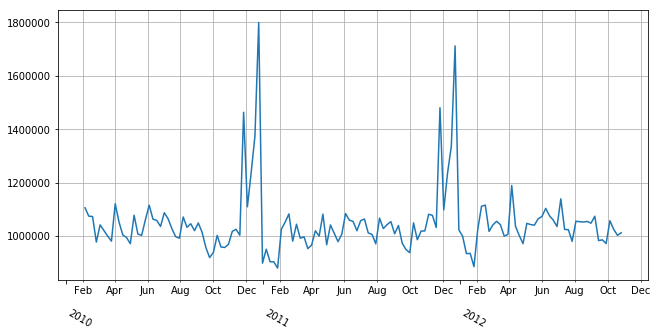

In [8]:
# plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
dates_x =dates.datestr2num(df_2.Date)
ax.plot_date(dates_x, df_2.Weekly_Sales,'-')
ax.xaxis.set_minor_locator(dates.MonthLocator(interval=2))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b\n'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y'))
plt.tight_layout()
plt.gcf().autofmt_xdate( ha='left', rotation= -30)
fig.set_size_inches(10,5)
plt.show()